In [9]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load csv file from GitHub into a DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/saleha-12/bike_sharing/refs/heads/main/EDA/day.csv')

# Check top 3 rows of DataFrame
df.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


In [4]:
# Check number of rows and columns
df.shape

(731, 16)

In [ ]:
# Check column names and types
df.info()

# 'dteday' column is a string, which will need to be converted to datetime if using date in calculations
# Columns 'temp', 'atemp', 'hum', and 'windspeed' are floats
# The remaining columns are all integers
# This dataset does not have any missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
# Check summary stats (also checking for outliers)
df.describe()

# Some observations: there is a significant difference between the number of 'casual' and 'registered' users, seen when comparing min/max and the percentile groupings.
# Column 'weekday' has integeres between 0-6, so week starts at 0
# Column 'weathersit' has no rows that are '4', meaning there was no 'Heavy Rain' during the entire time period of the dataset
# Column 'cnt' min in 22, and max is 8714, meaning significant fluctuation of total rental bikes throughout time period
# No outliers spotted, as all columns make sense in regards to the numbers inputted and what ethe column represents

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
# Check if any duplicates
df.duplicated().sum()

# No duplicates

0

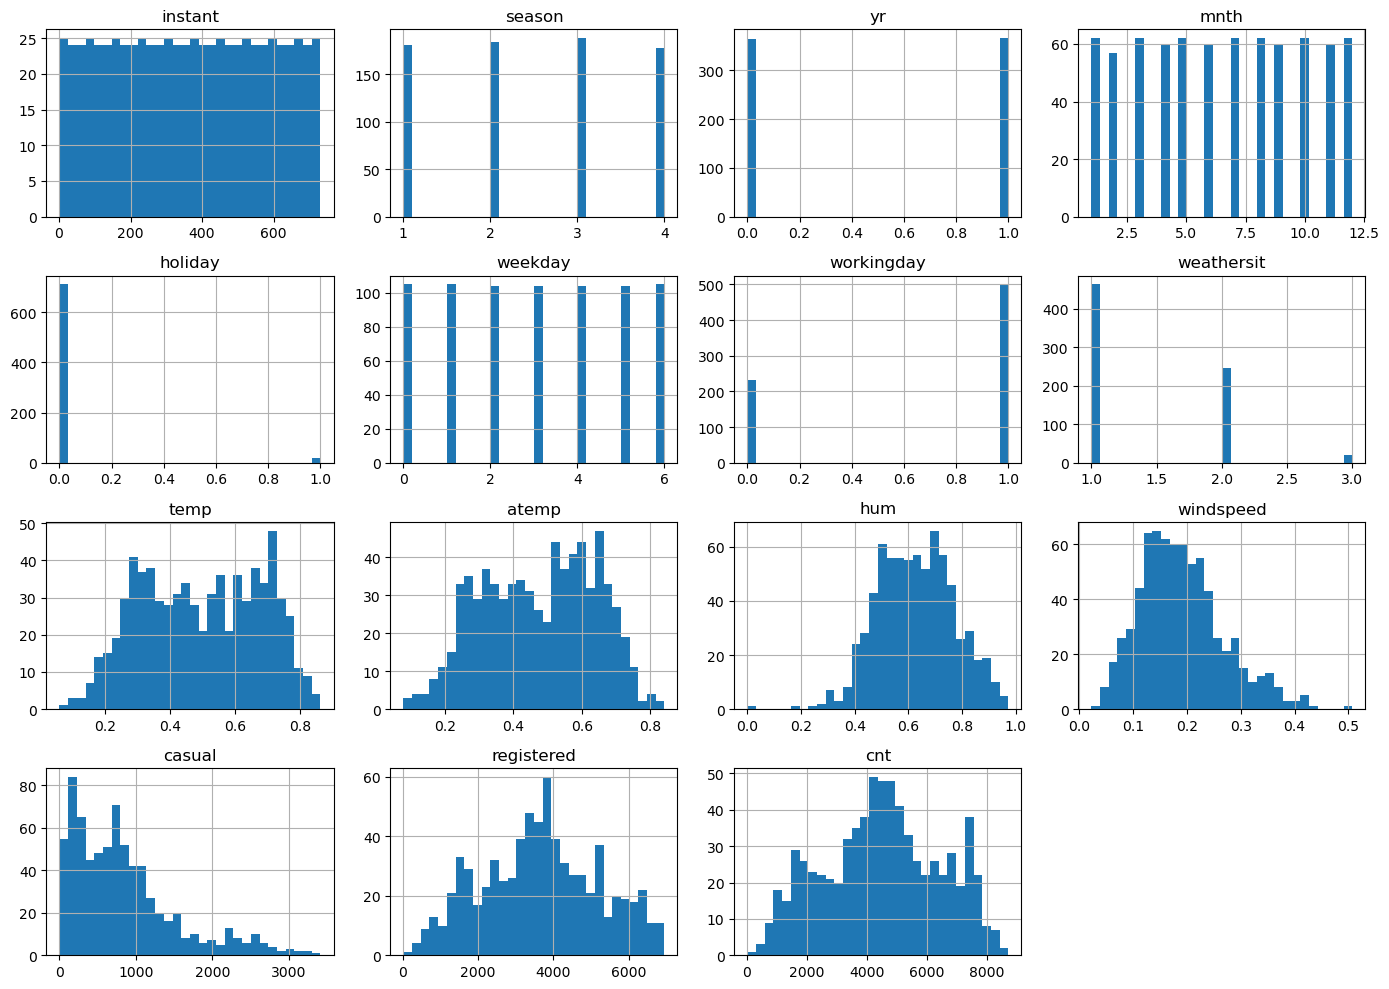

In [ ]:
# Check and visualize distribution of features
df.hist(figsize=(14, 10), bins=30)  
# prevent overlap
plt.tight_layout() 
plt.show()

# Some observations: most common weather type was '1' for clear, followed by '2' for misty which occurred about half the time as '1', very few '3' for light snow, and no '4' at all for heavy rain.
# Significantly more 'registered' users

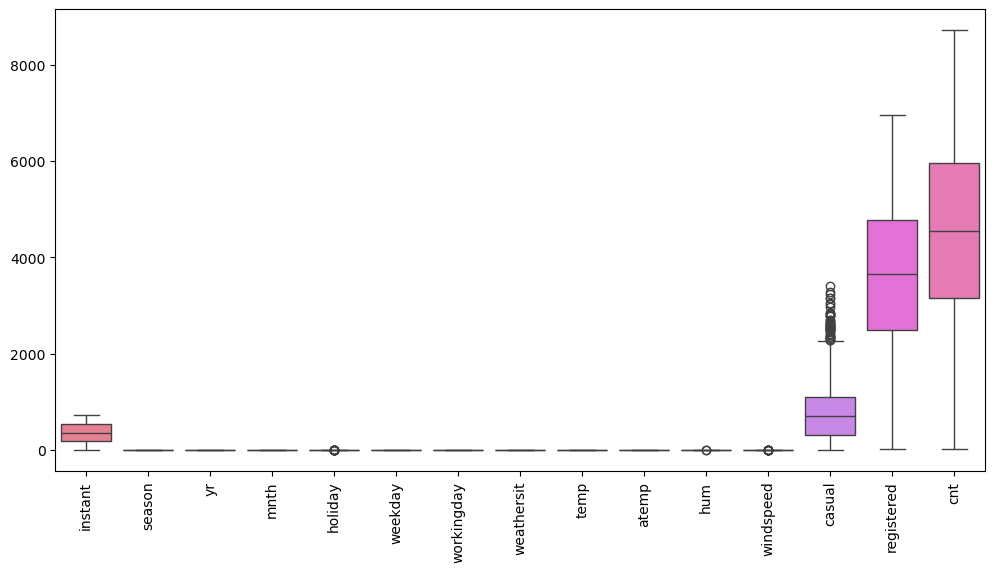

In [ ]:
# Visualizing and detecting outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

# 'casual' column shows a large number of outliers, which most likely means there are certain times when these casual users are renting bikes more often, which makes the fluctuations
# wider than the 'registered' users.

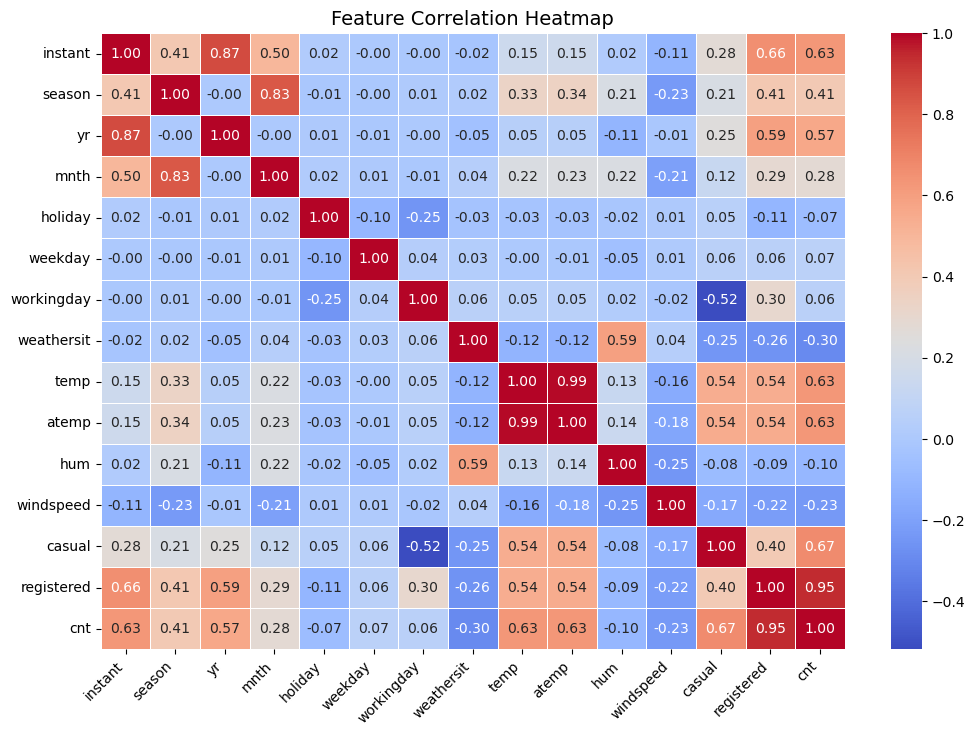

In [ ]:
# Correlation matrix to check relationships between variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.drop(columns=["dteday"]).corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.xticks(rotation=45, ha='right')
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

# Initial observations: season, year, weathersit, temp, atemp, and windspeed affect the number of rentals ('cnt')